In [7]:
import pandas as pd
import trackpal as tp

# Simple track features
## 1. Create some simulated tracks
1. Simulate tracks
 * brownian motion (pure random walk)
 * linear motion with some randomness


In [8]:
trj_brownian = tp.simulate.brownian(n_tracks=10)
trj_linear   = tp.simulate.brownian_linear(n_tracks=10)

trj_brownian

,TrackID,FRAME,Position X,Position Y
0,0,0,118.618838,18.883572
1,0,1,117.578334,17.314935
2,0,2,113.605302,17.082704
3,0,3,113.397081,16.931158
4,0,4,113.978639,17.842011
...,...,...,...,...
425,9,38,151.126927,-15.543743
426,9,39,152.319892,-14.090035
427,9,40,151.992647,-17.337754
428,9,41,152.774128,-17.647589


## 2. Add information to tables and concatenate tracks
1. Define column identifiers
2. Give tracks a tag `"label"` for later use
3. Merge the two track tables into one

In [9]:
trackid = "TrackID"
frameid = "FRAME"
coords_xy = ["Position X", "Position Y"]

trj_brownian["label"] = 0
trj_linear["label"]   = 1

# concatenate (note: the trackids need to be relabeled) 
trj = tp.concat_relabel([trj_linear, trj_brownian], trackid=trackid)

trj

,TrackID,FRAME,Position X,Position Y,label
0,0,0,104.667129,98.089962,1
1,0,1,106.951600,99.050245,1
2,0,2,108.374573,95.834643,1
3,0,3,111.247945,95.633633,1
4,0,4,111.903122,96.374613,1
...,...,...,...,...,...
855,19,38,151.126927,-15.543743,0
856,19,39,152.319892,-14.090035,0
857,19,40,151.992647,-17.337754,0
858,19,41,152.774128,-17.647589,0


## 3. Plot tracks

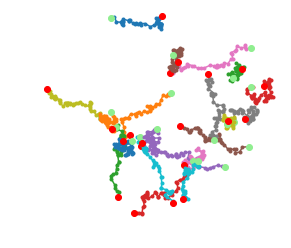

In [10]:
trj.groupby(trackid).apply(tp.visu.plot_trj, coords=coords_xy, line_fmt=".-");

## 3. Compute simple track features
 * Confinement ratio (ratio of start/end net distance vs. total track distance)
 * Statistics of the instantaneous speed

In [11]:
# prepare feature factory
feature_factory = tp.features.Features(frame=frameid, coords=coords_xy)

# compute two features
conf_ratio  = feature_factory.get("confinement_ratio")
speed_stats = feature_factory.get("speed_stats")

conf_ratio_res  = trj.groupby(trackid).apply(conf_ratio.compute)
speed_stats_res = trj.groupby(trackid).apply(speed_stats.compute)

# retrieve labels assignment
y = trj.groupby(trackid)["label"].first()

# merge into single DataFrame
features = pd.concat([conf_ratio_res, speed_stats_res, y], axis=1)

## Visualize two features as scatter plot
* Confinement ratio
* speed average 

and color code each tracks motion type.

The two motion types have similar average speed, but confinement ratio is disciminating them

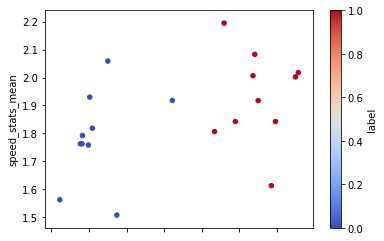

In [12]:
# plot with pandas
features.plot.scatter(x="confinement_ratio", y="speed_stats_mean", c="label", cmap="coolwarm");